In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.interpolate import interp1d

In [3]:
energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.0.csv.gz")

In [4]:
energy_0.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,0,0,2016-01-01 01:00:00,0.0
2,0,0,2016-01-01 02:00:00,0.0
3,0,0,2016-01-01 03:00:00,0.0
4,0,0,2016-01-01 04:00:00,0.0


In [6]:
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    8784 non-null   int64  
 1   meter          8784 non-null   int64  
 2   timestamp      8784 non-null   object 
 3   meter_reading  8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [7]:
energy_0['timestamp'] = pd.to_datetime(energy_0['timestamp'])

In [8]:
energy_0['hour'] = energy_0['timestamp'].dt.hour

In [9]:
energy_0.head()

,building_id,meter,timestamp,meter_reading,hour
0,0,0,2016-01-01 00:00:00,0.0,0
1,0,0,2016-01-01 01:00:00,0.0,1
2,0,0,2016-01-01 02:00:00,0.0,2
3,0,0,2016-01-01 03:00:00,0.0,3
4,0,0,2016-01-01 04:00:00,0.0,4


In [10]:
energy_0_hours = energy_0.groupby('hour')
energy_0_averages = pd.DataFrame({'Среднее':energy_0_hours.mean()['meter_reading'],
                                 'Медиана':energy_0_hours.median()['meter_reading']
                                 })

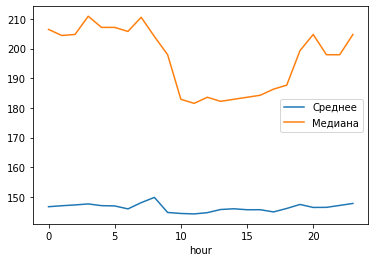

In [11]:
energy_0_averages.plot()

In [17]:
energy_0_hours_filtered = energy_0[energy_0['meter_reading'] > 0].groupby('hour')

In [19]:
energy_0_hours_averages_filtered = pd.DataFrame({'Среднее':energy_0_hours_filtered.mean()['meter_reading'],
                                 'Медиана':energy_0_hours_filtered.median()['meter_reading']
                                 })

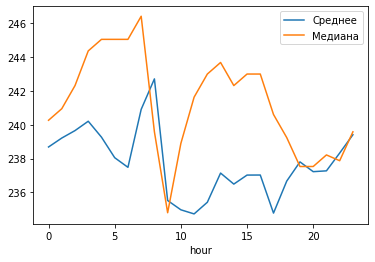

In [20]:
energy_0_hours_averages_filtered.plot()

In [21]:
x = np.arange(0,24)
y = interp1d(x,energy_0_hours_filtered.median()['meter_reading'],kind='cubic')

In [22]:
xn = np.arange(0,23.1,0.1)
yn = y(xn)

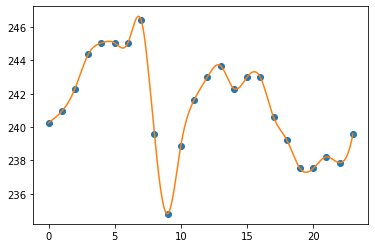

In [24]:
plt.plot(x,energy_0_hours_filtered.median()['meter_reading'],'o',xn,yn,'-')